<a href="https://colab.research.google.com/github/RajKalyanT/Calculator/blob/main/ESG_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inputs**

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



---



# **Load the Dataset**


In [16]:
# Load the dataset
data = pd.read_csv('esg_data.csv')

# Display the first few rows of the dataset
print(data.head())


   Rainfall  Emissions  Temperature_Change  GDP_Growth  Inflation_Rate  \
0      1100         10                 1.2         5.0             3.1   
1      1300         12                 1.3         4.8             2.5   
2      1000          8                 1.0         6.0             3.2   
3      1200         15                 1.5         5.5             2.9   
4       900          5                 0.8         6.2             1.8   

   Beneficiary_Count  Diversity_Index  Renewable_Energy_Usage  \
0               2000               45                      80   
1               2500               50                      75   
2               1500               40                      60   
3               3000               48                      70   
4               1800               42                      55   

   Governance_Policies  Audit_Compliance_Score  Commitment_Amount  \
0                    6                      90                 50   
1                    5    

# **Preprocessing the Data**

In [17]:
X = data.drop(columns=['ESG_Score'])  # Features (all columns except ESG_Score)
y = data['ESG_Score']  # Target (ESG_Score column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Training**
Using **Random Forest Regression**

In [18]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


# **Evaluate the Model**

Optimized MAE: 1.6354567299983873
Optimized R-squared: 0.6032289374439058


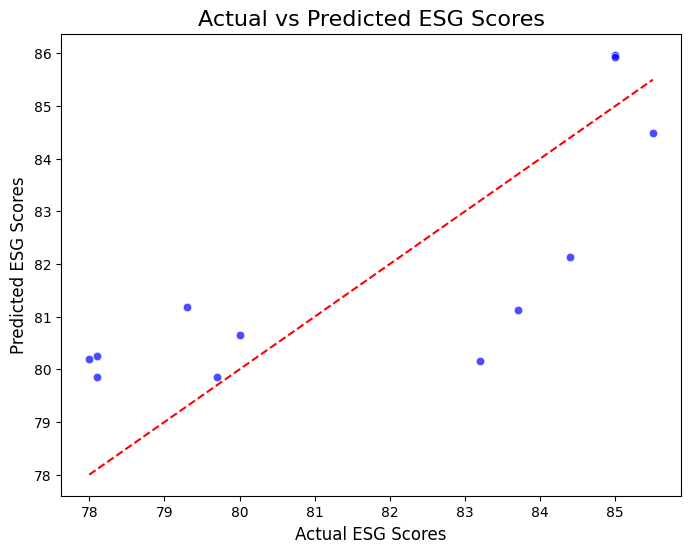

In [19]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized MAE: {mae}")
print(f"Optimized R-squared: {r2}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.title('Actual vs Predicted ESG Scores', fontsize=16)
plt.xlabel('Actual ESG Scores', fontsize=12)
plt.ylabel('Predicted ESG Scores', fontsize=12)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a line for perfect predictions
plt.show()

# **Save the Model**

In [20]:
import joblib
joblib.dump(best_rf, 'esg_score_model.pkl')

['esg_score_model.pkl']